In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
X_df = pd.read_csv('data/X_train.csv')
Y_df = pd.read_csv('data/Y_train.csv')

In [98]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,...,False,True,False,False,False,True,False,False,True,True
1,2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,...,False,True,False,False,False,False,False,False,False,False
2,3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,...,False,True,False,True,False,False,True,True,True,False
3,4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,...,False,True,True,False,False,False,False,False,True,True
4,5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,True


In [99]:
Y_df.head()

,id,price
0,1,15500.0
1,2,2800.0
2,3,16700.0
3,4,11000.0
4,5,6800.0


## Count NaN values

In [91]:
X_df.isnull().sum()

id                0
manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    9
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
dtype: int64

## Delete null rows

In [96]:
Y_df = Y_df.drop(X_df[X_df.engineCapacity.isnull()].index)
X_df = X_df.drop(X_df[X_df.engineCapacity.isnull()].index)
print(X_df.shape, Y_df.shape)

(29991, 23) (29991, 2)


## Count unique values 

In [62]:
for c in X_df.columns:
    print(c, len(X_df[str(c)].unique()))

id 29991
manufacturer 50
model 990
transmission 2
color 12
odometer 5050
year 49
engineFuel 4
engineType 2
engineCapacity 57
bodyType 12
drivetrain 3
photos 59
feature_0 2
feature_1 2
feature_2 2
feature_3 2
feature_4 2
feature_5 2
feature_6 2
feature_7 2
feature_8 2
feature_9 2


## Label encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

for c in X_df.columns:
    if len(X_df[str(c)].unique()) == 2:
        X_df[str(c)] = LabelEncoder().fit_transform(X_df[str(c)])

In [64]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,Hyundai,i40,0,red,48000,2014,gasoline,1,2.0,...,0,1,0,0,0,1,0,0,1,1
1,2,Mitsubishi,Carisma,1,green,320000,2000,diesel,0,1.9,...,0,1,0,0,0,0,0,0,0,0
2,3,Volkswagen,T5,1,white,164000,2011,diesel,0,2.0,...,0,1,0,1,0,0,1,1,1,0
3,4,Volkswagen,T4 Multivan,1,blue,385672,1998,diesel,0,2.5,...,0,1,1,0,0,0,0,0,1,1
4,5,Toyota,Camry,0,black,215652,2005,gasoline,1,2.4,...,0,0,0,0,0,0,0,0,0,1


## One hot encoding

In [65]:
columns = X_df.columns
for c in columns:
    c = str(c)
    len_unique = len(X_df[c].unique())
    if len_unique > 2 and len_unique < 10:
        one_hot = pd.get_dummies(X_df[c], drop_first=True)
        X_df = pd.concat([X_df, one_hot], axis=1)
        X_df.drop(c, axis=1, inplace=True)

In [66]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineType,engineCapacity,bodyType,...,feature_5,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-diesel,hybrid-petrol,front,rear
0,1,Hyundai,i40,0,red,48000,2014,1,2.0,sedan,...,1,0,0,1,1,1,0,0,1,0
1,2,Mitsubishi,Carisma,1,green,320000,2000,0,1.9,hatchback,...,0,0,0,0,0,0,0,0,1,0
2,3,Volkswagen,T5,1,white,164000,2011,0,2.0,minibus,...,0,1,1,1,0,0,0,0,1,0
3,4,Volkswagen,T4 Multivan,1,blue,385672,1998,0,2.5,minibus,...,0,0,0,1,1,0,0,0,1,0
4,5,Toyota,Camry,0,black,215652,2005,1,2.4,sedan,...,0,0,0,0,1,1,0,0,1,0


In [67]:
X_df.shape

(29991, 26)

## Drop same features

In [68]:
sames = []

columns = X_df.columns
n = len(columns)
for i in range(n):
    for j in range(i + 1, n):
        if sum(X_df.iloc[:, i] == X_df.iloc[:, j])== X_df.shape[0]:
                sames.append((i, j))
                
sames

[]

In [69]:
column_numbers = list(range(X_df.shape[1]))
for s in sames:
    column_numbers.remove(s[0])
X_df = X_df.iloc[:, column_numbers]

In [70]:
X_df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineType,engineCapacity,bodyType,...,feature_5,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-diesel,hybrid-petrol,front,rear
0,1,Hyundai,i40,0,red,48000,2014,1,2.0,sedan,...,1,0,0,1,1,1,0,0,1,0
1,2,Mitsubishi,Carisma,1,green,320000,2000,0,1.9,hatchback,...,0,0,0,0,0,0,0,0,1,0
2,3,Volkswagen,T5,1,white,164000,2011,0,2.0,minibus,...,0,1,1,1,0,0,0,0,1,0
3,4,Volkswagen,T4 Multivan,1,blue,385672,1998,0,2.5,minibus,...,0,0,0,1,1,0,0,0,1,0
4,5,Toyota,Camry,0,black,215652,2005,1,2.4,sedan,...,0,0,0,0,1,1,0,0,1,0


## Split train-val

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(23992, 26) (23992, 2) (5999, 26) (5999, 2)


## Target encoding

In [72]:
# gop X_df, Y_df
X_df = pd.concat([X_df, Y_df.price], axis=1)
X_df

,id,manufacturer,model,transmission,color,odometer,year,engineType,engineCapacity,bodyType,...,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-diesel,hybrid-petrol,front,rear,price
0,1,Hyundai,i40,0,red,48000,2014,1,2.0,sedan,...,0,0,1,1,1,0,0,1,0,15500.0
1,2,Mitsubishi,Carisma,1,green,320000,2000,0,1.9,hatchback,...,0,0,0,0,0,0,0,1,0,2800.0
2,3,Volkswagen,T5,1,white,164000,2011,0,2.0,minibus,...,1,1,1,0,0,0,0,1,0,16700.0
3,4,Volkswagen,T4 Multivan,1,blue,385672,1998,0,2.5,minibus,...,0,0,1,1,0,0,0,1,0,11000.0
4,5,Toyota,Camry,0,black,215652,2005,1,2.4,sedan,...,0,0,0,1,1,0,0,1,0,6800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Acura,TSX,0,black,252000,2008,1,2.4,sedan,...,0,1,1,1,1,0,0,1,0,9500.0
29996,29997,Ford,Mondeo,1,red,290000,1997,1,1.8,sedan,...,0,0,0,0,1,0,0,1,0,1750.0
29997,29998,Mitsubishi,Galant,1,grey,250000,1993,1,2.0,hatchback,...,0,0,0,1,1,0,0,1,0,1400.0
29998,29999,Opel,Astra,1,silver,267000,2002,0,1.7,universal,...,0,0,0,1,0,0,0,1,0,3700.0


In [73]:
# Manufacturer
manufacturer_avg_price = X_df.groupby('manufacturer')['price'].mean()
X_df['manufacturer'] = X_df['manufacturer'].map(manufacturer_avg_price)

# Model
model_avg_price = X_df.groupby('model')['price'].mean()
X_df['model'] = X_df['model'].map(model_avg_price)

# Color
color_avg_price = X_df.groupby('color')['price'].mean()
X_df['color'] = X_df['color'].map(color_avg_price)

# BodyType
bodyType_avg_price = X_df.groupby('bodyType')['price'].mean()
X_df['bodyType'] = X_df['bodyType'].map(bodyType_avg_price)

X_df.head()


,id,manufacturer,model,transmission,color,odometer,year,engineType,engineCapacity,bodyType,...,feature_6,feature_7,feature_8,feature_9,gasoline,hybrid-diesel,hybrid-petrol,front,rear,price
0,1,7732.888018,13090.954545,0,4408.925181,48000,2014,1,2.0,5789.697142,...,0,0,1,1,1,0,0,1,0,15500.0
1,2,5548.014831,1716.666386,1,3039.382555,320000,2000,0,1.9,4123.856447,...,0,0,0,0,0,0,0,1,0,2800.0
2,3,6410.332885,11785.210526,1,8395.739645,164000,2011,0,2.0,8713.137007,...,1,1,1,0,0,0,0,1,0,16700.0
3,4,6410.332885,8691.938387,1,4630.662329,385672,1998,0,2.5,8713.137007,...,0,0,1,1,0,0,0,1,0,11000.0
4,5,9665.474553,10876.478151,0,9271.108469,215652,2005,1,2.4,5789.697142,...,0,0,0,1,1,0,0,1,0,6800.0


In [74]:
# tach Y_df
X_df.pop('price')

0        15500.0
1         2800.0
2        16700.0
3        11000.0
4         6800.0
          ...   
29995     9500.0
29996     1750.0
29997     1400.0
29998     3700.0
29999     1100.0
Name: price, Length: 29991, dtype: float64

## Describe

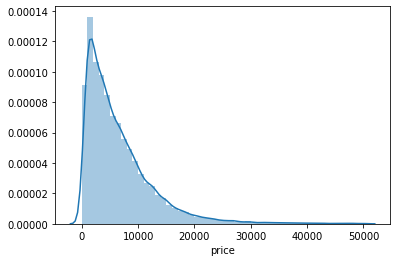

In [77]:
sns.distplot(Y_df['price'])

In [78]:
Y_df.price.describe()

count    29991.000000
mean      6596.436659
std       6092.176086
min          1.000000
25%       2300.000000
50%       4900.000000
75%       8990.000000
max      50000.000000
Name: price, dtype: float64

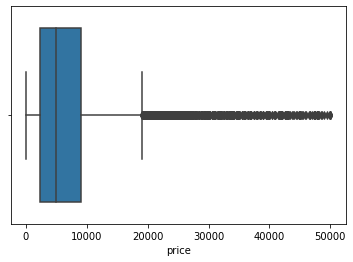

In [80]:
sns.boxplot(Y_df.price)